### Note
**Method:**
S - property sold;\
SP - property sold prior;\
PI - property passed in;\
PN - sold prior not disclosed;\
SN - sold not disclosed;\
NB - no bid;\
VB - vendor bid;\
W - withdrawn prior to auction;\
SA - sold after auction;\
SS - sold after auction price not disclosed.\
N/A - price or highest bid not available.\

**Type:**
br - bedroom(s);\
h - house,cottage,villa, semi,terrace;\
u - unit, duplex;\
t - townhouse;\
dev site - development site;\
o res - other residential.\

**Description:**
SellerG: Real Estate Agent\
Date: Date sold\
Distance: Distance from CBD in Kilometres\
Regionname: General Region (West, North West, North, North east …etc)\
Propertycount: Number of properties that exist in the suburb.\
Bedroom2 : Scraped # of Bedrooms (from different source)\
Bathroom: Number of Bathrooms\
Car: Number of carspots\
Landsize: Land Size in Metres\
BuildingArea: Building Size in Metres\
YearBuilt: Year the house was built\
CouncilArea: Governing council for the area\
Lattitude: Self explanitory\
Longtitude: Self explanitory

In [1]:
#Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
# Reading Data
Data = pd.read_csv('Melbourne_housing_FULL.csv')
Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Analysing all categorical and numerical data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
# Analysing Numerical data only
Data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
# Shortcut to get numerical columns 
Data.describe().columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

**Dealing with Missing Values**

In [6]:
# Counts of missing Values in each columns
Data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
# Percentage of Missings in each columns
Data.isnull().sum()/len(Data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [8]:
# Getting list of columns with missing values 
cols_with_missing = [col for col in Data.columns if Data[col].isnull().any()]
cols_with_missing

['Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

**Removing Missing Values**

In [9]:
from sklearn.impute import SimpleImputer
Data_imputer = SimpleImputer(strategy='most_frequent')

In [10]:
imputed_Data = pd.DataFrame(Data_imputer.fit_transform(Data))

In [11]:
# Imputation renoved column names so puting them back
imputed_Data.columns = Data.columns

In [12]:
# Checking for missing values in the Data.
imputed_Data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
imputed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Suburb         34857 non-null  object
 1   Address        34857 non-null  object
 2   Rooms          34857 non-null  object
 3   Type           34857 non-null  object
 4   Price          34857 non-null  object
 5   Method         34857 non-null  object
 6   SellerG        34857 non-null  object
 7   Date           34857 non-null  object
 8   Distance       34857 non-null  object
 9   Postcode       34857 non-null  object
 10  Bedroom2       34857 non-null  object
 11  Bathroom       34857 non-null  object
 12  Car            34857 non-null  object
 13  Landsize       34857 non-null  object
 14  BuildingArea   34857 non-null  object
 15  YearBuilt      34857 non-null  object
 16  CouncilArea    34857 non-null  object
 17  Lattitude      34857 non-null  object
 18  Longtitude     34857 non-n

**Checking for dtypes**

In [14]:
# Converting the dtypes of columns into right dtypes
#Converting into Categorical dtypes
cat_col = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in cat_col:
    imputed_Data[colname] = imputed_Data[colname].astype('object') 

#Converting into Numerical dtypes
int_col = ['Rooms', 'Price', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
           'YearBuilt', 'Propertycount']
flt_col = ['Distance', 'Lattitude', 'Longtitude']
for colname in int_col:
    imputed_Data[colname] = imputed_Data[colname].astype('int64')
for colname in flt_col:
    imputed_Data[colname] = imputed_Data[colname].astype('float64')   

# Converting to date object
imputed_Data['Date'] = pd.to_datetime(imputed_Data['Date'])

C:\Users\tinhl\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tinhl\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tinhl\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\tinhl\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/04/2016' in DD/MM/YYYY format. Provide format or specif

In [15]:
# Rechecking the dtypes
imputed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          34857 non-null  int64         
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34857 non-null  float64       
 9   Postcode       34857 non-null  int64         
 10  Bedroom2       34857 non-null  int64         
 11  Bathroom       34857 non-null  int64         
 12  Car            34857 non-null  int64         
 13  Landsize       34857 non-null  int64         
 14  BuildingArea   34857 non-null  int64         
 15  YearBuilt      3485

**Removing Outliers**

In [16]:
num_col = imputed_Data.select_dtypes(exclude=['object', 'datetime64[ns]'])
num_col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,600000,2.5,3067,2,1,1,126,120,1970,-37.80140,144.99580,4019
1,2,1480000,2.5,3067,2,1,1,202,120,1970,-37.79960,144.99840,4019
2,2,1035000,2.5,3067,2,1,0,156,79,1900,-37.80790,144.99340,4019
3,3,600000,2.5,3067,3,2,1,0,120,1970,-37.81140,145.01160,4019
4,3,1465000,2.5,3067,3,2,0,134,150,1900,-37.80930,144.99440,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000,6.3,3013,4,1,3,593,120,1970,-37.81053,144.88467,6543
34853,2,888000,6.3,3013,2,2,1,98,104,2018,-37.81551,144.88826,6543
34854,2,705000,6.3,3013,2,1,2,220,120,2000,-37.82286,144.87856,6543
34855,3,1140000,6.3,3013,3,1,2,0,120,1970,-37.83610,144.99660,6543


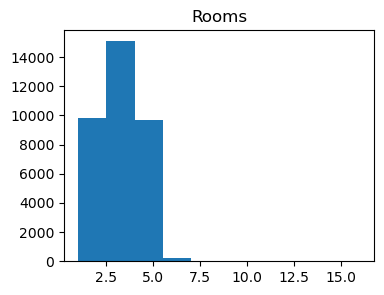

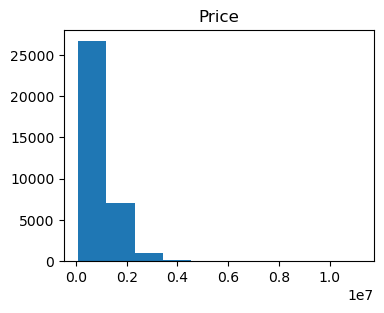

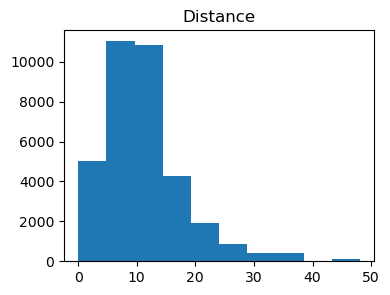

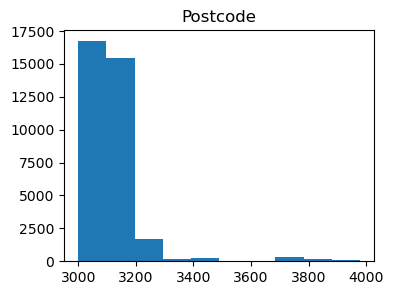

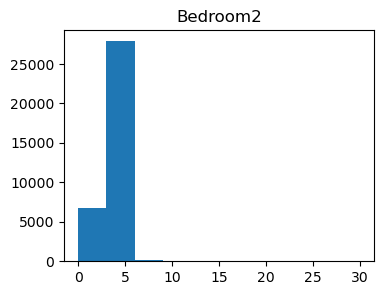

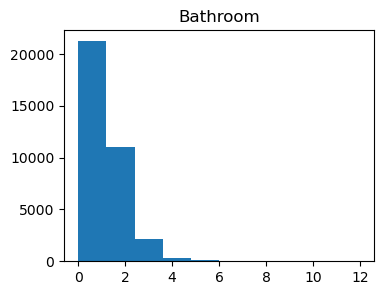

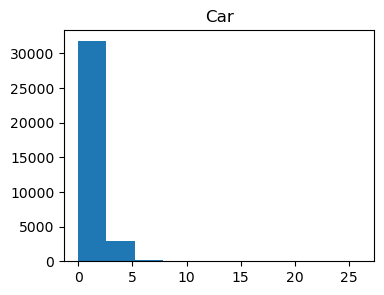

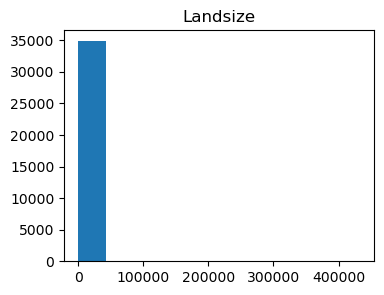

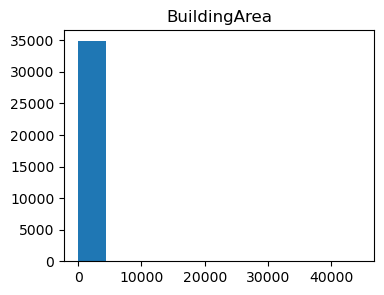

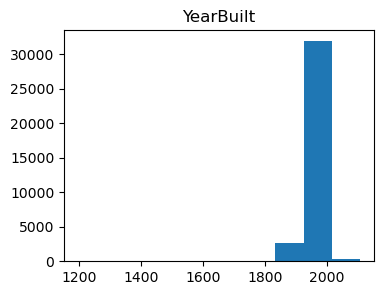

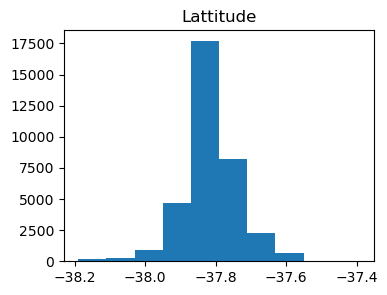

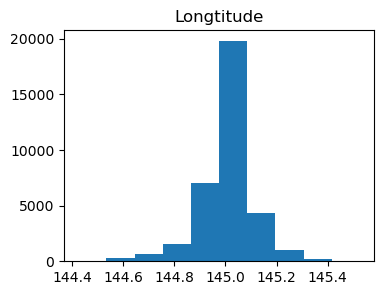

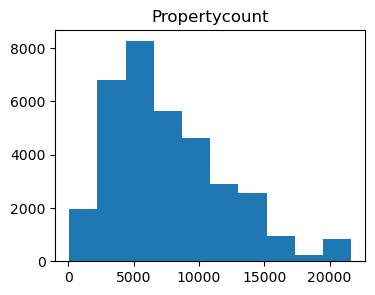

In [17]:
# Ploting Box Plot for each numerical columns
import matplotlib.pyplot as plt
for i in num_col:
    plt.figure(figsize=(4, 3))
    plt.hist(num_col[i])
    plt.title(i)
    plt.show()

In [18]:
# Defining a function to get the Ranges
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
print('The Range of Number of Room ',minmax(imputed_Data['Rooms']))
print('The Range of Price ',minmax(imputed_Data['Price']))
print('The Range of Distance ',minmax(imputed_Data['Distance']))
print('The Range of Landsize ',minmax(imputed_Data['Landsize']))
print('The Range of YearBuilt ',minmax(imputed_Data['YearBuilt']))

The Range of Number of Room  (1, 16)
The Range of Price  (85000, 11200000)
The Range of Distance  (0.0, 48.1)
The Range of Landsize  (0, 433014)
The Range of YearBuilt  (1196, 2106)


In [19]:
# Getting entries for building having more than 4 and 10 rooms
imputed_Data[imputed_Data['Rooms']>4].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
76,Airport West,33 Bowes Av,5,h,1035000,S,Airport,2016-06-08,13.5,3042,...,1,2,0,120,1970,Moonee Valley City Council,-37.8361,144.9966,Western Metropolitan,3464
81,Airport West,11 Harrington Rd,6,h,725000,SP,Barry,2016-07-05,13.5,3042,...,3,2,976,186,1980,Moonee Valley City Council,-37.7239,144.8735,Western Metropolitan,3464
96,Airport West,241 Parer Rd,5,h,755000,PI,Propertyau,2016-05-14,13.5,3042,...,2,2,596,120,1970,Moonee Valley City Council,-37.7248,144.8699,Western Metropolitan,3464
153,Albert Park,23 Finlay St,5,h,2100000,S,Greg,2016-10-12,3.3,3206,...,2,1,237,120,1970,Port Phillip City Council,-37.8436,144.9557,Southern Metropolitan,3280
175,Albert Park,143 Kerferd Rd,7,h,600000,SN,hockingstuart,2016-09-24,3.3,3206,...,7,0,435,120,1970,Port Phillip City Council,-37.8473,144.9539,Southern Metropolitan,3280


In [20]:
imputed_Data[imputed_Data['Rooms']>10].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8309,Preston,12 Lyonsville Av,12,h,600000,SN,Barry,2016-08-28,8.8,3072,...,1,2,0,120,1970,Darebin City Council,-37.83610,144.99660,Northern Metropolitan,14577
12959,Hawthorn,10 Berkeley St,12,h,4700000,PI,Property,2017-05-20,4.6,3122,...,1,2,0,120,1970,Boroondara City Council,-37.83030,145.03670,Southern Metropolitan,11308
26210,Mitcham,20 Harrison St,16,h,5000000,S,Buxton,2017-10-28,17.2,3132,...,8,8,0,120,1970,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871
27150,Melton,213 Station Rd,12,h,710000,S,PRDNationwide,2017-11-11,31.7,3337,...,5,3,960,223,1970,Melton City Council,-37.68830,144.57760,Western Victoria,3600


In [21]:
# As we can see from previous two cells, its not possible to build more than 6 rooms within 120Sq.Mtr (~1200Sq.Mtr).
# So it might be wrong entry. Hence we can drop those entries (Rows) as its only few Rows (Entries).
cleaned_Data_R = imputed_Data[imputed_Data['Rooms']<=8]

In [22]:
cleaned_Data_R.shape

(34843, 21)

In [23]:
# Now we are left with entries with only less than 8 rooms
print('The Range of Number of Room ',minmax(cleaned_Data_R['Rooms']))

The Range of Number of Room  (1, 8)


In [24]:
# Analysing Bathroom
print('The Range of Bathroom ',minmax(imputed_Data['Bathroom']))
print(imputed_Data[imputed_Data['Bathroom']==0].shape)


The Range of Bathroom  (0, 12)
(46, 21)


In [25]:
imputed_Data[imputed_Data['Bathroom']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
228,Alphington,6 Naroon Rd,3,h,1485000,SP,McGrath,2016-08-28,6.4,3078,...,0,0,597,120,1970,Darebin City Council,-37.77810,145.02840,Northern Metropolitan,2211
481,Armadale,3/50 Denbigh Rd,2,u,546000,SP,hockingstuart,2016-07-30,6.3,3143,...,0,0,0,120,1970,Stonnington City Council,-37.85680,145.01610,Southern Metropolitan,4836
845,Balaclava,5/11 Albion St,2,u,497500,PI,hockingstuart,2016-08-28,6.6,3183,...,0,0,0,120,1970,Port Phillip City Council,-37.87390,144.99290,Southern Metropolitan,2952
1009,Balwyn,5 Shrimpton Ct,2,h,1010000,PI,Marshall,2016-07-30,9.7,3103,...,0,0,1611,120,1970,Boroondara City Council,-37.80920,145.10160,Southern Metropolitan,5682
1549,Bentleigh East,579 Warrigal Rd,3,h,700000,S,Thomson,2016-05-22,13.9,3165,...,0,0,456,120,1970,Glen Eira City Council,-37.93140,145.08080,Southern Metropolitan,10969
1772,Brighton,17 New St,3,h,1900000,S,Marshall,2016-06-08,11.2,3186,...,0,0,0,120,1970,Bayside City Council,-37.93010,144.99350,Southern Metropolitan,10579
1784,Brighton,1/5 Webb St,3,t,1067000,S,Kay,2016-07-05,11.2,3186,...,0,1,0,120,1970,Bayside City Council,-37.91190,144.98710,Southern Metropolitan,10579
2716,Camberwell,5 Nicholsdale Rd,4,h,1400000,PI,Jellis,2016-04-16,7.8,3124,...,0,0,693,120,1935,Boroondara City Council,-37.83600,145.09140,Southern Metropolitan,8920
2853,Canterbury,5/25 Chatham Rd,3,h,600000,SP,Jellis,2016-04-23,9.0,3126,...,0,0,502,120,1970,Boroondara City Council,-37.82140,145.08580,Southern Metropolitan,3265
3717,Eaglemont,3/43 Waldemar Rd,3,t,600000,SN,Miles,2016-08-10,10.3,3084,...,0,0,0,120,1970,Banyule City Council,-37.75940,145.05420,Eastern Metropolitan,1651


In [26]:
# Previous cell shows that 46 houses does not have Bathroom but the Price of that rooms is high.
# So we can drop that too
cleaned_Data_R_B = cleaned_Data_R[cleaned_Data_R['Bathroom']>0]

In [27]:
cleaned_Data_R_B.shape

(34797, 21)

In [28]:
# Again, Building Area cannot be 0, if it is, then Price for that Building cannot be in thousands of Australian dollars
# So just remove it
cleaned_Data_R_B_A = cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']>0]

In [29]:
# Analysing BuildingArea
print('The Range of Landsize ',minmax(cleaned_Data_R_B_A['Landsize']))
print(cleaned_Data_R_B_A[cleaned_Data_R_B_A['Landsize']<=50].shape)


The Range of Landsize  (0, 433014)
(14232, 21)


In [30]:
cleaned_Data_R_B_A[cleaned_Data_R_B_A['Landsize']<50]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,2016-04-02,2.5,3067,...,2,1,0,120,1970,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
15,Abbotsford,217 Langridge St,3,h,1000000,S,Jellis,2016-08-10,2.5,3067,...,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
16,Abbotsford,18a Mollison St,2,t,745000,S,Jellis,2016-08-10,2.5,3067,...,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
17,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,2016-08-10,2.5,3067,...,1,1,0,120,1970,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019
19,Abbotsford,403/609 Victoria St,2,u,542000,S,Dingle,2016-08-10,2.5,3067,...,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000,SP,Raine,2018-02-24,6.8,3016,...,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34839,Williamstown,24/18 Station Rd,2,u,475000,SP,Greg,2018-02-24,6.8,3016,...,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34840,Williamstown,3/2 Thompson St,2,u,520000,VB,Raine,2018-02-24,6.8,3016,...,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34844,Windsor,4/16 Lewisham Rd,1,u,440000,SP,Biggin,2018-02-24,4.6,3181,...,1,2,0,120,1970,Port Phillip City Council,-37.8361,144.9966,Southern Metropolitan,4380


In [31]:
# Analysing BuildingArea
print('The Range of BuildingArea ',minmax(imputed_Data['BuildingArea']))
print('Shape of BbildingArea is ',cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']==0].shape)


The Range of BuildingArea  (0, 44515)
Shape of BbildingArea is  (77, 21)


In [32]:
cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000,S,Jellis,2017-04-03,2.3,3051,...,1,1,215,0,2000,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821
16540,South Melbourne,148 Cobden St,3,h,600000,S,Marshall,2017-06-24,1.9,3205,...,2,0,282,0,1920,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943
19775,Balwyn North,14 Wanbrow Av,5,h,1950000,S,RT,2017-03-09,9.7,3104,...,3,2,743,0,1949,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809
19840,Bundoora,22 Moreton Cr,3,h,814000,S,Barry,2017-03-09,12.1,3083,...,1,2,542,0,1970,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175
20038,Heidelberg Heights,8 Thames St,3,h,600000,SN,Miles,2017-03-09,8.8,3081,...,1,2,658,0,1920,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,Wollert,42 Rhone Dr,4,h,722500,S,LJH,2018-02-17,25.5,3750,...,2,2,512,0,1970,Whittlesea City Council,-37.61971,145.02910,Northern Metropolitan,2940
33397,Greenvale,26 Perugia Av,4,h,677000,S,Ray,2018-03-17,20.4,3059,...,2,2,312,0,2013,Hume City Council,-37.62439,144.88629,Northern Metropolitan,4864
33660,Preston,91 Dundas St,3,h,950000,PI,Spencer,2018-03-17,8.4,3072,...,1,2,301,0,1935,Darebin City Council,-37.75302,145.00948,Northern Metropolitan,14577
33899,Wollert,40 Whitebark St,4,h,615000,S,HAR,2018-03-17,25.5,3750,...,2,2,392,0,2015,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940


In [33]:
cleaned_Data_R_B_A

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,...,1,1,126,120,1970,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,...,1,1,202,120,1970,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,...,1,0,156,79,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,2016-04-02,2.5,3067,...,2,1,0,120,1970,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,...,2,0,134,150,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,2018-02-24,6.3,3013,...,1,3,593,120,1970,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,2018-02-24,6.3,3013,...,2,1,98,104,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,2018-02-24,6.3,3013,...,1,2,220,120,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,2018-02-24,6.3,3013,...,1,2,0,120,1970,Maribyrnong City Council,-37.83610,144.99660,Western Metropolitan,6543


In [34]:
# Now try to find is there any which not justify with BuildingArea
cleaned_Data_R_B_A[cleaned_Data_R_B_A['BuildingArea']<50]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
41,Abbotsford,138/56 Nicholson St,3,u,1090000,S,Jellis,2017-03-18,2.5,3067,...,2,2,4290,27,1970,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
55,Abbotsford,166 Gipps St,3,h,1290000,S,Biggin,2017-02-25,2.5,3067,...,2,2,147,18,1970,Yarra City Council,-37.80500,144.99430,Northern Metropolitan,4019
177,Albert Park,13/52 Moubray St,1,u,442500,S,Marshall,2017-02-25,3.3,3206,...,1,0,0,34,1970,Port Phillip City Council,-37.84210,144.95170,Southern Metropolitan,3280
242,Altona,173 Queen St,3,h,1335000,S,hockingstuart,2016-08-10,13.8,3018,...,1,4,777,22,1953,Hobsons Bay City Council,-37.86970,144.82490,Western Metropolitan,5301
278,Altona,5/57 Blyth St,3,u,730000,SP,Barlow,2016-05-28,13.8,3018,...,2,1,70,3,2014,Hobsons Bay City Council,-37.86800,144.82850,Western Metropolitan,5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32893,Taylors Lakes,3 Lynne Ct,4,h,791000,S,Reliance,2018-02-17,15.5,3038,...,2,2,750,30,1970,Brimbank City Council,-37.70316,144.78168,Western Metropolitan,5336
33346,Footscray,50 Everard St,2,t,620000,S,Jas,2018-03-17,5.1,3011,...,1,0,104,2,1970,Maribyrnong City Council,-37.79656,144.88523,Western Metropolitan,7570
33358,Gladstone Park,9 Farley Ct,3,h,700000,S,Ray,2018-03-17,12.9,3043,...,2,1,591,19,1970,Hume City Council,-37.68479,144.89602,Western Metropolitan,3285
33479,Kings Park,19 Aldergate Cr,3,h,585000,SP,Frank,2018-03-17,14.0,3021,...,1,4,706,18,1985,Brimbank City Council,-37.74012,144.77180,Western Metropolitan,2878


In [35]:
# Its not Possible to cunstruct 3 rooms in 3 Sq.Mtr Area.....And so on
# So I'm going to move forward with Area more than 50Sq.Mtr only
cleaned_Data_R_B_BA = cleaned_Data_R_B_A[cleaned_Data_R_B_A['BuildingArea']>50]

In [36]:
# Analysing Landsize
print('The Range of Landsize ',minmax(imputed_Data['Landsize']))
print('The Range of BuildingArea ',minmax(imputed_Data['BuildingArea']))

cleaned_Data_R_B_BA[['Landsize','BuildingArea', 'Price','Rooms']].head()

The Range of Landsize  (0, 433014)
The Range of BuildingArea  (0, 44515)


,Landsize,BuildingArea,Price,Rooms
0,126,120,600000,2
1,202,120,1480000,2
2,156,79,1035000,2
3,0,120,600000,3
4,134,150,1465000,3


In [37]:
# As we can see in previous cell The Range of Landsize has a wide range (0, 433014). 
#So I'm trying to get only genuine size of land for the BuildingArea

cleaned_Data_R_B_BA_L = cleaned_Data_R_B_BA[cleaned_Data_R_B_BA['Landsize']>50]
cleaned_Data_R_B_BA_L.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,...,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,...,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,...,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,...,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067,...,2,1,94,120,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019


In [38]:
# Still data has something which is not acceptable, for instance index 5 has Landsize=94 and BuildingArea is 120 which seems impossible.
# Hence, selecting only those data which has Landsize more than or equal to BuildingArea

cleaned_Data_R_B_BA_LS = cleaned_Data_R_B_BA[cleaned_Data_R_B_BA['Landsize'] >= cleaned_Data_R_B_BA['BuildingArea']]
print(cleaned_Data_R_B_BA_LS.shape)

(19567, 21)


In [39]:
cleaned_Data_R_B_BA_LS.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,...,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,...,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,...,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000,SN,Nelson,2016-06-08,2.5,3067,...,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,600000,S,Biggin,2016-06-08,2.5,3067,...,1,2,201,120,1900,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019


In [40]:
# Now I thing we have almost a good Data to move further 
cleaned_Data_R_B_BA_LS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19567 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         19567 non-null  object        
 1   Address        19567 non-null  object        
 2   Rooms          19567 non-null  int64         
 3   Type           19567 non-null  object        
 4   Price          19567 non-null  int64         
 5   Method         19567 non-null  object        
 6   SellerG        19567 non-null  object        
 7   Date           19567 non-null  datetime64[ns]
 8   Distance       19567 non-null  float64       
 9   Postcode       19567 non-null  int64         
 10  Bedroom2       19567 non-null  int64         
 11  Bathroom       19567 non-null  int64         
 12  Car            19567 non-null  int64         
 13  Landsize       19567 non-null  int64         
 14  BuildingArea   19567 non-null  int64         
 15  YearBuilt      1956

In [41]:
# Save data to processed data
cleaned_Data_R_B_BA_LS.to_csv('Melbourne_housing_processed.csv', index=False)